# Dataset Wrangling and EDA
This notebook is used for:
1. Consolidating various datasets into one
2. Converting the dataset into a more standard format
3. Simple feature expansion (bad name?)
4. Exploratory Data Analysis

## Declaring variables

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Consolidating various datasets into one

## Exploratory Data Analysis
### Importing formatted dataset

In [6]:
df = pd.read_csv('../data/final.csv', dtype={'citizen': 'string', 'sex': 'string', 'age': 'string', 'decision': 'string', 'geo': 'string', 'TIME_PERIOD': 'string', 'GENCONV': "Int64", 'HUMSTAT': "Int64", 'SUB_PROT': "Int64", 'REJECTED': "Int64", 'TOTAL_APPS': "Int64", "POS_RATE": "Float64"}, keep_default_na=False, na_values=['nan'])
df

,citizen,sex,age,geo,TIME_PERIOD,GENCONV,HUMSTAT,SUB_PROT,REJECTED,TOTAL_POS,TOTAL_APPS,POS_RATE
0,AD,F,UNK,AT,2008-Q1,0,0,0,0,0,0,<NA>
1,AD,F,UNK,AT,2008-Q2,0,0,0,0,0,0,<NA>
2,AD,F,UNK,AT,2008-Q3,0,0,0,0,0,0,<NA>
3,AD,F,UNK,AT,2008-Q4,0,0,0,0,0,0,<NA>
4,AD,F,UNK,AT,2009-Q1,0,0,0,0,0,0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
7221109,ZW,UNK,Y_LT14,UK,2019-Q3,0,0,0,0,0,0,<NA>
7221110,ZW,UNK,Y_LT14,UK,2019-Q4,0,0,0,0,0,0,<NA>
7221111,ZW,UNK,Y_LT14,UK,2020-Q1,0,0,0,0,0,0,<NA>
7221112,ZW,UNK,Y_LT14,UK,2020-Q2,0,0,0,0,0,0,<NA>


In [19]:
df.groupby(['TIME_PERIOD']).sum(numeric_only=True)

,GENCONV,HUMSTAT,SUB_PROT,REJECTED,TOTAL_APPS,POS_RATE
TIME_PERIOD,,,,,,
2008-Q1,6605,3150,2915,30755,32480,369.669211
2008-Q2,7000,3490,3865,38015,41630,373.196188
2008-Q3,6510,2740,5330,40235,44190,349.11971
2008-Q4,6890,2490,7080,48200,52765,375.509377
2009-Q1,7545,2915,6260,41250,46405,374.11802
...,...,...,...,...,...,...
2022-Q3,34570,20055,27470,82450,126080,837.403369
2022-Q4,35690,20520,26420,80275,123325,833.970797
2023-Q1,34630,30410,31880,82735,136890,863.095941


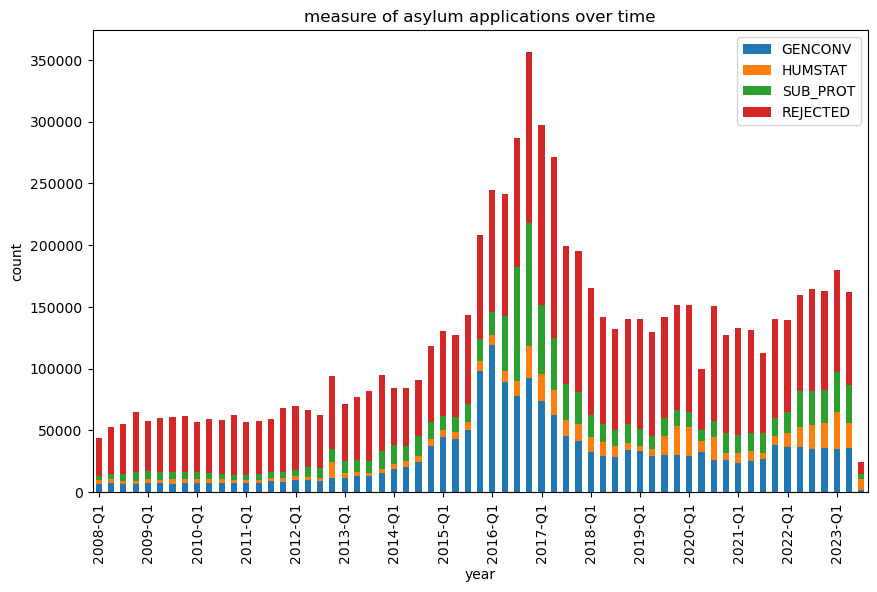

In [36]:
fig_title = "asylum-outcomes-over-times.png"

decisions_by_time = df.groupby(['TIME_PERIOD']).sum(numeric_only=True).drop("TOTAL_APPS", axis=1).drop("POS_RATE", axis=1)
decisions_by_time.plot(kind='bar', stacked=True,figsize=(10,6))

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)

plt.xlabel('year')
plt.ylabel('count')
plt.title('measure of asylum applications over time')

plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=400, transparent=False)
plt.show()